In [2]:
import numpy
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.recurrent import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import aux_func as f


Using Theano backend.


In [6]:
feature_dim = 1
look_back = 0
data_file = 'abelha-only-temp.csv'
data_use_percent = 1

# fix random seed for reproducibility
#numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv(data_file, engine='python')

def create_window(data, feature_name, past_times =[]):
    index = [feature_name]
    dataframe = data.copy()
    for i in past_times:
        dataframe[feature_name+'_t-'+str(i)] = dataframe[feature_name].shift(periods=i, freq=None, axis=0)
        index.append(feature_name+'_t-'+str(i))
    index.append('act')
    
    return dataframe.tail(-max(window)).reindex_axis(index,axis=1)

def normalize(dataframe):
    old_act = dataframe['act']
    dataframe2 = (dataframe - dataframe.min())/(dataframe.max() - dataframe.min())
    dataframe2['act'] = old_act
    return dataframe2

def train_predict(dataframe, times = 1):
    dataset2 = dataframe.values
    #resizing dataset len for faster tests 
    dataset2 = dataset2[:int(len(dataset2)*data_use_percent)]
    dataset2 = dataset2.astype('float32')

    # split into train and test sets
    train_size = int(len(dataset2) * 0.70)
    test_size = len(dataset2) - train_size
    train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset2),:]

    

    trainX, trainY = f.create_dataset(train, feature_dim, look_back)
    testX, testY = f.create_dataset(test, feature_dim, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


    for i in range(times):
        model = f.baseline_model(feature_dim + look_back)
        model.fit(trainX, trainY, nb_epoch=500, verbose=0)

        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
        print(str(i)+' Train Score: %.6f RMSE' % (trainScore))
        testScore = math.sqrt(mean_squared_error(testY, testPredict))
        print(str(i)+' Test Score: %.6f RMSE' % (testScore))

    f.g_plot(dataset2,trainPredict, testPredict, feature_dim, look_back)
    

dataframe.head(8), feature_dim

(   temp    act
 0  22.9  0.023
 1  22.8  0.028
 2  22.9  0.092
 3  22.6  0.161
 4  22.9  0.276
 5  24.5  0.618
 6  26.7  1.060
 7  28.2  1.240, 1)

In [10]:
dataframe1 = normalize(dataframe)
dataframe1

,temp,act
0,0.026549,0.023
1,0.017699,0.028
2,0.026549,0.092
3,0.000000,0.161
4,0.026549,0.276
5,0.168142,0.618
6,0.362832,1.060
7,0.495575,1.240
8,0.601770,1.217
9,0.681416,1.346


0 Train Score: 0.407068 RMSE
0 Test Score: 0.342247 RMSE
1 Train Score: 0.398047 RMSE
1 Test Score: 0.334783 RMSE
2 Train Score: 0.407598 RMSE
2 Test Score: 0.347444 RMSE
3 Train Score: 0.407682 RMSE
3 Test Score: 0.343112 RMSE
4 Train Score: 0.405155 RMSE
4 Test Score: 0.339447 RMSE
5 Train Score: 0.409703 RMSE
5 Test Score: 0.346366 RMSE
6 Train Score: 0.400863 RMSE
6 Test Score: 0.342327 RMSE
7 Train Score: 0.408718 RMSE
7 Test Score: 0.346587 RMSE
8 Train Score: 0.407487 RMSE
8 Test Score: 0.343304 RMSE
9 Train Score: 0.408379 RMSE
9 Test Score: 0.346141 RMSE


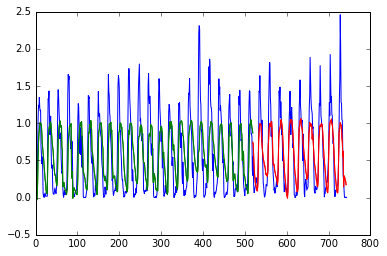

In [11]:
train_predict(dataframe1,10)

In [12]:
window = [3]
dataframe1 = normalize(dataframe)
dataframe1 = create_window(dataframe1, "temp", window)
feature_dim = len(window) + 1
dataframe1, feature_dim

(         temp  temp_t-3    act
 3    0.000000  0.026549  0.161
 4    0.026549  0.017699  0.276
 5    0.168142  0.026549  0.618
 6    0.362832  0.000000  1.060
 7    0.495575  0.026549  1.240
 8    0.601770  0.168142  1.217
 9    0.681416  0.362832  1.346
 10   0.743363  0.495575  1.207
 11   0.831858  0.601770  1.166
 12   0.805310  0.681416  1.175
 13   0.796460  0.743363  0.691
 14   0.734513  0.831858  0.581
 15   0.619469  0.805310  0.456
 16   0.495575  0.796460  0.548
 17   0.442478  0.734513  0.382
 18   0.398230  0.619469  0.060
 19   0.362832  0.495575  0.009
 20   0.318584  0.442478  0.046
 21   0.265487  0.398230  0.005
 22   0.221239  0.362832  0.037
 23   0.176991  0.318584  0.065
 24   0.159292  0.265487  0.019
 25   0.088496  0.221239  0.019
 26   0.079646  0.176991  0.019
 27   0.061947  0.159292  0.019
 28   0.088496  0.088496  0.019
 29   0.283186  0.079646  0.876
 30   0.495575  0.061947  1.329
 31   0.601770  0.088496  1.314
 32   0.690265  0.283186  1.433
 ..     

0 Train Score: 0.228400 RMSE
0 Test Score: 0.257620 RMSE
1 Train Score: 0.262936 RMSE
1 Test Score: 0.258250 RMSE
2 Train Score: 0.233215 RMSE
2 Test Score: 0.264124 RMSE
3 Train Score: 0.226484 RMSE
3 Test Score: 0.264624 RMSE
4 Train Score: 0.238272 RMSE
4 Test Score: 0.245862 RMSE
5 Train Score: 0.241074 RMSE
5 Test Score: 0.258603 RMSE
6 Train Score: 0.234330 RMSE
6 Test Score: 0.253448 RMSE
7 Train Score: 0.243352 RMSE
7 Test Score: 0.255919 RMSE
8 Train Score: 0.232787 RMSE
8 Test Score: 0.262545 RMSE
9 Train Score: 0.217716 RMSE
9 Test Score: 0.271040 RMSE


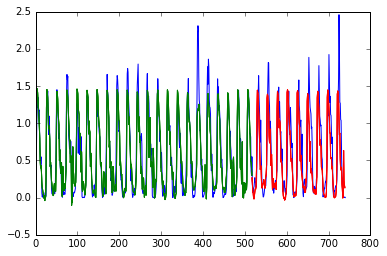

In [13]:
train_predict(dataframe1,10)

In [14]:
window = [3,6]
dataframe1 = normalize(dataframe)
dataframe1 = create_window(dataframe1, "temp", window)
feature_dim = len(window) + 1
dataframe1

,temp,temp_t-3,temp_t-6,act
6,0.362832,0.000000,0.026549,1.060
7,0.495575,0.026549,0.017699,1.240
8,0.601770,0.168142,0.026549,1.217
9,0.681416,0.362832,0.000000,1.346
10,0.743363,0.495575,0.026549,1.207
11,0.831858,0.601770,0.168142,1.166
12,0.805310,0.681416,0.362832,1.175
13,0.796460,0.743363,0.495575,0.691
14,0.734513,0.831858,0.601770,0.581
15,0.619469,0.805310,0.681416,0.456


0 Train Score: 0.213322 RMSE
0 Test Score: 0.255954 RMSE
1 Train Score: 0.206579 RMSE
1 Test Score: 0.268128 RMSE
2 Train Score: 0.218414 RMSE
2 Test Score: 0.256106 RMSE
3 Train Score: 0.226913 RMSE
3 Test Score: 0.244998 RMSE
4 Train Score: 0.221749 RMSE
4 Test Score: 0.247164 RMSE
5 Train Score: 0.213105 RMSE
5 Test Score: 0.286355 RMSE
6 Train Score: 0.200919 RMSE
6 Test Score: 0.263115 RMSE
7 Train Score: 0.201500 RMSE
7 Test Score: 0.260533 RMSE
8 Train Score: 0.214093 RMSE
8 Test Score: 0.254982 RMSE
9 Train Score: 0.222929 RMSE
9 Test Score: 0.251919 RMSE


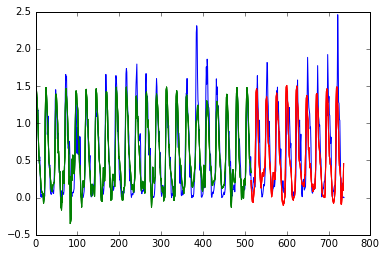

In [15]:
train_predict(dataframe1,10)

In [16]:
window = [3,6,12]
dataframe1 = normalize(dataframe)
dataframe1 = create_window(dataframe1, "temp", window)
feature_dim = len(window) + 1
dataframe1

,temp,temp_t-3,temp_t-6,temp_t-12,act
12,0.805310,0.681416,0.362832,0.026549,1.175
13,0.796460,0.743363,0.495575,0.017699,0.691
14,0.734513,0.831858,0.601770,0.026549,0.581
15,0.619469,0.805310,0.681416,0.000000,0.456
16,0.495575,0.796460,0.743363,0.026549,0.548
17,0.442478,0.734513,0.831858,0.168142,0.382
18,0.398230,0.619469,0.805310,0.362832,0.060
19,0.362832,0.495575,0.796460,0.495575,0.009
20,0.318584,0.442478,0.734513,0.601770,0.046
21,0.265487,0.398230,0.619469,0.681416,0.005


0 Train Score: 0.173833 RMSE
0 Test Score: 0.275318 RMSE
1 Train Score: 0.206345 RMSE
1 Test Score: 0.286301 RMSE
2 Train Score: 0.183426 RMSE
2 Test Score: 0.278125 RMSE
3 Train Score: 0.186874 RMSE
3 Test Score: 0.269492 RMSE
4 Train Score: 0.205238 RMSE
4 Test Score: 0.266227 RMSE
5 Train Score: 0.179151 RMSE
5 Test Score: 0.263744 RMSE
6 Train Score: 0.177858 RMSE
6 Test Score: 0.266563 RMSE
7 Train Score: 0.196319 RMSE
7 Test Score: 0.262372 RMSE
8 Train Score: 0.196493 RMSE
8 Test Score: 0.257264 RMSE
9 Train Score: 0.196143 RMSE
9 Test Score: 0.253333 RMSE


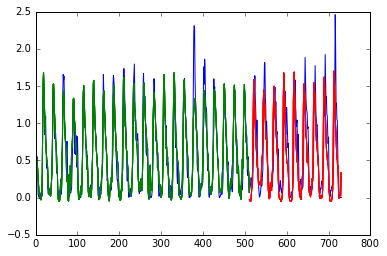

In [17]:
train_predict(dataframe1,10)

In [18]:
window = [3,6,12,24]
dataframe1 = normalize(dataframe)
dataframe1 = create_window(dataframe1, "temp", window)
feature_dim = len(window) + 1
dataframe1

,temp,temp_t-3,temp_t-6,temp_t-12,temp_t-24,act
24,0.159292,0.265487,0.398230,0.805310,0.026549,0.019
25,0.088496,0.221239,0.362832,0.796460,0.017699,0.019
26,0.079646,0.176991,0.318584,0.734513,0.026549,0.019
27,0.061947,0.159292,0.265487,0.619469,0.000000,0.019
28,0.088496,0.088496,0.221239,0.495575,0.026549,0.019
29,0.283186,0.079646,0.176991,0.442478,0.168142,0.876
30,0.495575,0.061947,0.159292,0.398230,0.362832,1.329
31,0.601770,0.088496,0.088496,0.362832,0.495575,1.314
32,0.690265,0.283186,0.079646,0.318584,0.601770,1.433
33,0.734513,0.495575,0.061947,0.265487,0.681416,1.114


0 Train Score: 0.176525 RMSE
0 Test Score: 0.253033 RMSE
1 Train Score: 0.187313 RMSE
1 Test Score: 0.269942 RMSE
2 Train Score: 0.182794 RMSE
2 Test Score: 0.261374 RMSE
3 Train Score: 0.178557 RMSE
3 Test Score: 0.265140 RMSE
4 Train Score: 0.182109 RMSE
4 Test Score: 0.240596 RMSE
5 Train Score: 0.190025 RMSE
5 Test Score: 0.253154 RMSE
6 Train Score: 0.181933 RMSE
6 Test Score: 0.266461 RMSE
7 Train Score: 0.180588 RMSE
7 Test Score: 0.271079 RMSE
8 Train Score: 0.182007 RMSE
8 Test Score: 0.251596 RMSE
9 Train Score: 0.185700 RMSE
9 Test Score: 0.258462 RMSE


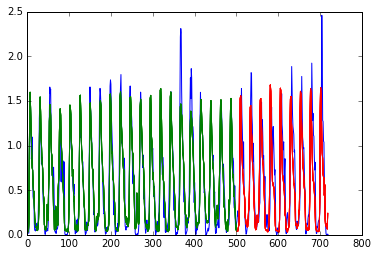

In [19]:
train_predict(dataframe1,10)

In [20]:
feature_dim

5